In [18]:
#Importing required packages
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Finding current working directory
path = os.getcwd()
print("The current working directory is: %s" % path)

The current working directory is: /home/nbuser/library


In [ ]:
#Create new base folder
basefolder = "AppliedProject_1"
os.mkdir(basefolder)

#Define three new folders in the "AppliedProject_1" directory
os.mkdir(basefolder + "/FourFolderTask_Part1")
os.mkdir(basefolder + "/ManyFolderTask_Part2")
os.mkdir(basefolder + "/RawData")

In [3]:
#Read dataset using pandas
df=pd.read_csv("AppliedProject_1/RawData/TAQ_SPY_CT_20200107.csv")
df.head(2)

,Unnamed: 0,TIME_M,EX,SIZE,PRICE,TR_SEQNUM,TR_SOURCE,TR_RF,FileID,keepme,OddLot,InterMrkSweep,CM
0,0,4:00:00.017598438,P,775,324.10,8301,C,NaN,2,0,0,0,1
1,1,4:00:08.071044383,P,200,324.13,8601,C,NaN,2,0,0,1,1


In [4]:
#Drop column named "Unnamed"
df=df.loc[:,~df.columns.str.contains('Unnamed:')]

In [5]:
#Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 12 columns):
TIME_M           226067 non-null object
EX               226067 non-null object
SIZE             226067 non-null int64
PRICE            226067 non-null float64
TR_SEQNUM        226067 non-null int64
TR_SOURCE        226067 non-null object
TR_RF            33543 non-null object
FileID           226067 non-null int64
keepme           226067 non-null int64
OddLot           226067 non-null int64
InterMrkSweep    226067 non-null int64
CM               226067 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 20.7+ MB


In [6]:
#df.describe()
df.head(2)

,TIME_M,EX,SIZE,PRICE,TR_SEQNUM,TR_SOURCE,TR_RF,FileID,keepme,OddLot,InterMrkSweep,CM
0,4:00:00.017598438,P,775,324.10,8301,C,NaN,2,0,0,0,1
1,4:00:08.071044383,P,200,324.13,8601,C,NaN,2,0,0,1,1


In [7]:
#Convert string into datetime using pandas
df['TIME_M']=pd.to_datetime(df.TIME_M,errors='ignore')
df['TIME_M']=df['TIME_M'].dt.time
df.head(2)

,TIME_M,EX,SIZE,PRICE,TR_SEQNUM,TR_SOURCE,TR_RF,FileID,keepme,OddLot,InterMrkSweep,CM
0,04:00:00.017598,P,775,324.10,8301,C,NaN,2,0,0,0,1
1,04:00:08.071044,P,200,324.13,8601,C,NaN,2,0,0,1,1


In [8]:
#Checking type of time variable
type(df.TIME_M[0])

datetime.time

In [ ]:
#Four Folder task
os.mkdir("AppliedProject_1\FourFolderTask_Part1\Folder1")
os.mkdir("AppliedProject_1\FourFolderTask_Part1\Folder2")
os.mkdir("AppliedProject_1\FourFolderTask_Part1\Folder3")
os.mkdir("AppliedProject_1\FourFolderTask_Part1\Folder4")

In [9]:
#Use numpy array_split for slicing the dataframe
df_4parts=np.array_split(df,4)

#Confirming that we have 4 parts in the object defined above 
print("Number of items in split dataframe 'df_4parts' is: " +str(len(df_4parts)))

print("Type of dataframe 'df_4parts' is: " + str(type(df_4parts)))

Number of items in split dataframe 'df_4parts' is: 4
Type of dataframe 'df_4parts' is: <class 'list'>


In [10]:
#Counting the number of observations in each iteam of the list
print("Number of items in 'df_4parts[0]' is: " +str(len(df_4parts[0])))
print("Number of items in 'df_4parts[1]' is: " +str(len(df_4parts[1])))
print("Number of items in 'df_4parts[2]' is: " +str(len(df_4parts[2])))
print("Number of items in 'df_4parts[3]' is: " +str(len(df_4parts[3])))

Number of items in 'df_4parts[0]' is: 56517
Number of items in 'df_4parts[1]' is: 56517
Number of items in 'df_4parts[2]' is: 56517
Number of items in 'df_4parts[3]' is: 56516


In [11]:
#Placing a set into each subfolder
df_4parts[0].to_csv("AppliedProject_1\FourFolderTask_Part1\Folder1\data1.csv")
df_4parts[1].to_csv("AppliedProject_1\FourFolderTask_Part1\Folder2\data2.csv")
df_4parts[2].to_csv("AppliedProject_1\FourFolderTask_Part1\Folder3\data3.csv")
df_4parts[3].to_csv("AppliedProject_1\FourFolderTask_Part1\Folder4\data4.csv")

In [12]:
#Q4
#Reading data from multiple folders into 'groups[i]'
base_loc="AppliedProject_1/FourFolderTask_Part1/Folder"
groups = [0]*5
folder_list=list(range(1,5))
for i in folder_list:
    groups[i] = pd.read_csv(base_loc+str(i)+"/data"+str(i)+".csv")

In [13]:
#Finding total volume traded grouped by exchange (EX) for each part and storing in 'temp[i]'
temp = [0]*5
for i in list(range(1,5)):
    groups[i]=groups[i].loc[:,~groups[i].columns.str.contains('Unnamed:')]
    groups[i]['TIME_M']=pd.to_datetime(groups[i]['TIME_M'],errors='ignore')
    groups[i]['hour_of_timestamp'] = groups[i]['TIME_M'].dt.hour
    groups[i]['TIME_M'] = groups[i]['TIME_M'].dt.time
    groups[i]['Not_Odd'] = groups[i]['SIZE'] - groups[i]['OddLot']
    groups[i]['Odd_Market'] = groups[i]['OddLot'] + groups[i]['InterMrkSweep']
    groups[i]['Not_Odd_Market'] = groups[i]['SIZE'] - groups[i]['Odd_Market']
    temp[i]= groups[i].groupby(['EX']).sum()

In [14]:
#part 4-a
#Output of folder1/data1.csv
temp[1]['SIZE'].head()

EX
A      10489
B     166923
C      30258
D    2170860
J     197005
Name: SIZE, dtype: int64

In [15]:
#Combined Summary of volume traded
summary_volume = temp[1]['SIZE'] + temp[2]['SIZE'] + temp[3]['SIZE'] + temp[4]['SIZE'] 
summary_volume.head()

EX
A       92548
B      441481
C       89895
D    11866243
J      629412
Name: SIZE, dtype: int64

In [16]:
#part 4-b
print(summary_volume.sort_values(ascending=False))

#P NYSE Arca, Inc.   - [highest]
#D Financial Industry Regulatory Authority, Inc. (FINRA ADF) 
#T NASDAQ Stock Exchange, LLC (in Tape A, B securities)
#Z Bats BZX Exchange, Inc.
#K Bats EDGX Exchange, Inc.
#M Chicago Stock Exchange, Inc. (CHX)
#N New York Stock Exchange LLC
#Y Bats BYX Exchange, Inc.
#V The Investors’ Exchange, LLC (IEX)     
#X NASDAQ OMX PSX, Inc. LLC  
#J Bats EDGA Exchange, INC     
#B NASDAQ OMX BX, Inc     
#A NYSE MKT LLC      
#C National Stock Exchange Inc. (NSX) -  [Lowest ]

#Reference: https://www.nyse.com/publicdocs/nyse/data/Daily_TAQ_Client_Spec_v3.0.pdf 

EX
P    12462522
D    11866243
T     6561728
Z     4184936
K     3825629
M     1903969
N     1359479
Y     1002423
V      793611
X      782175
J      629412
B      441481
A       92548
C       89895
Name: SIZE, dtype: int64


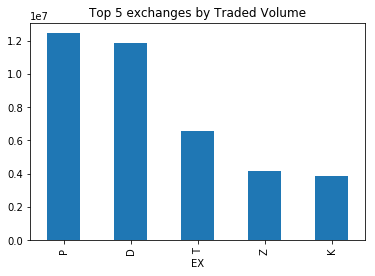

In [19]:
#Plot top 5 exchanges by traded volume
plotting_var=summary_volume.sort_values(ascending=False)[0:5]
plotting_var.plot(kind = 'bar',title="Top 5 exchanges by Traded Volume")

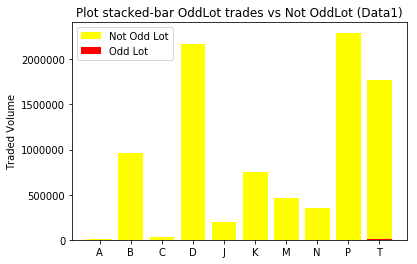

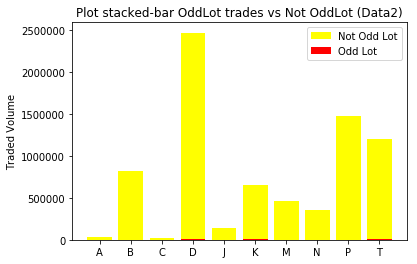

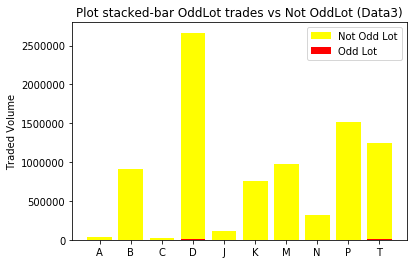

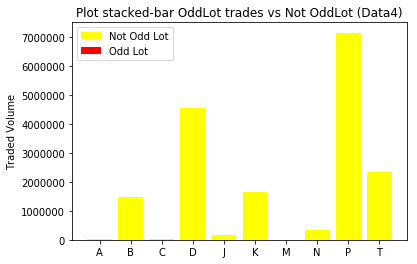

In [20]:
#part 4-c
#Plot stacked-bar OddLot trades vs Not OddLot
for i in list(range(1,5)):
    x=temp[i].index
    y1=temp[i]['OddLot']
    y2=temp[i]['Not_Odd']
    p1 = plt.bar(x,y2, color='yellow')
    p2 = plt.bar(x,y1,color='red')
    plt.ylabel('Traded Volume')
    plt.title('Plot stacked-bar OddLot trades vs Not OddLot (Data'+str(i)+')')
    plt.legend((p1[0], p2[0]), ('Not Odd Lot', 'Odd Lot'))
    plt.show()

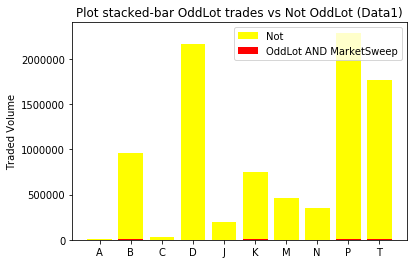

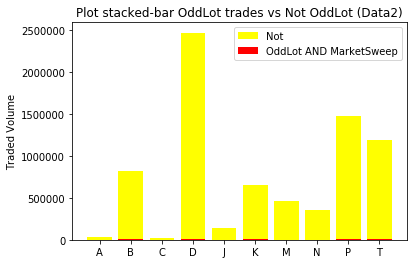

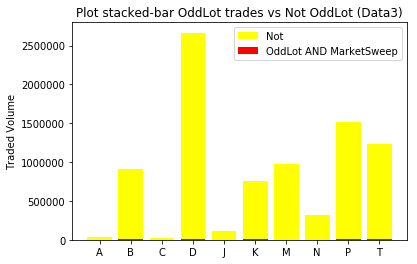

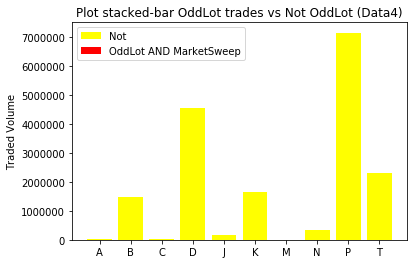

In [21]:
#Plot stacked-bar OddLot AND MarketSweep vs Not
for i in list(range(1,5)):
    x=temp[i].index
    y1=temp[i]['Odd_Market']
    y2=temp[i]['Not_Odd_Market']
    p1 = plt.bar(x,y2, color='yellow')
    p2 = plt.bar(x,y1,color='red')
    plt.ylabel('Traded Volume')
    plt.title('Plot stacked-bar OddLot trades vs Not OddLot (Data'+str(i)+')')
    plt.legend((p1[0], p2[0]), ('Not', 'OddLot AND MarketSweep'))
    plt.show()

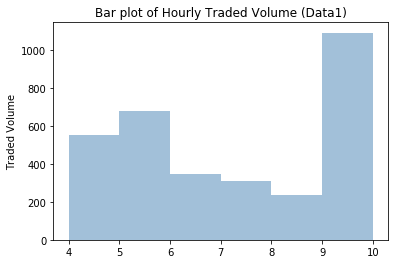

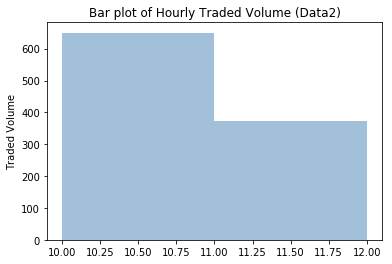

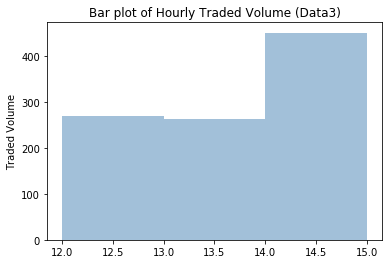

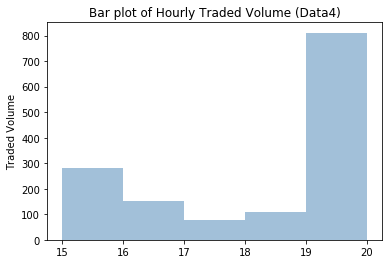

In [33]:
#part 4-d

for i in list(range(1,5)):
    bar_bins=groups[i]['hour_of_timestamp'].unique()
    plt.hist(groups[i]['SIZE'], bins=bar_bins, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='none')
    xlim=bar_bins
    xticks=bar_bins
    plt.ylabel('Traded Volume')
    plt.title('Bar plot of Hourly Traded Volume (Data'+str(i)+')')
    plt.show()


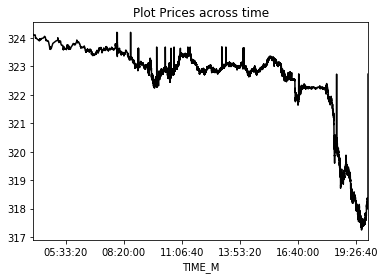

In [46]:
#part 4-e
for i in list(range(1,5)):
    trade_data= groups[i].PRICE
    trade_data.index = groups[i].TIME_M
    trade_data.plot(title="Plot Prices across time",color='Black')

In [47]:
#The issue with the High Frequency data is that there are several jumps and falls which are quite close to each other. This can be solved by subsetting the data

In [18]:
#Q5
#part 5-a
directory_loc="AppliedProject_1/ManyFolderTask_Part2/Folder_"
folder_list = list(range(1,76))
for i in folder_list:
    os.mkdir(directory_loc+str(i))

In [10]:
data=pd.read_csv("AppliedProject_1/RawData/TAQ_SPY_CT_20200107.csv")
data=data.loc[:,~data.columns.str.contains('Unnamed:')]
data_4parts=np.array_split(data,4)

In [19]:
RS=random.sample(folder_list,4)
for i in list(range(0,4)):
    data_4parts[i].to_csv(directory_loc+str(RS[i])+"/data_4parts["+str(i)+'].csv')
    print("Moved data_4parts["+str(i)+']'+'to Folder: '+str(RS[i]))
    RS_nested=random.sample(folder_list,3)
    data_4parts[i].to_csv(directory_loc+str(RS_nested[0])+"/data_4parts["+str(i)+'].csv')
    print("Moved data_4parts["+str(i)+']'+'to Folder: '+str(RS_nested[0]))
    data_4parts[i].to_csv(directory_loc+str(RS_nested[1])+"/data_4parts["+str(i)+'].csv')
    print("Moved data_4parts["+str(i)+']'+'to Folder: '+str(RS_nested[1]))
    data_4parts[i].to_csv(directory_loc+str(RS_nested[2])+"/data_4parts["+str(i)+'].csv')
    print("Moved data_4parts["+str(i)+']'+'to Folder: '+str(RS_nested[2]))


Moved data_4parts[0]to Folder: 40
Moved data_4parts[0]to Folder: 57
Moved data_4parts[0]to Folder: 15
Moved data_4parts[0]to Folder: 17
Moved data_4parts[1]to Folder: 21
Moved data_4parts[1]to Folder: 53
Moved data_4parts[1]to Folder: 14
Moved data_4parts[1]to Folder: 19
Moved data_4parts[2]to Folder: 67
Moved data_4parts[2]to Folder: 66
Moved data_4parts[2]to Folder: 53
Moved data_4parts[2]to Folder: 2
Moved data_4parts[3]to Folder: 8
Moved data_4parts[3]to Folder: 4
Moved data_4parts[3]to Folder: 63
Moved data_4parts[3]to Folder: 51


In [49]:
#part 5-b
directory_loc="AppliedProject_1/ManyFolderTask_Part2/Folder_"
folder_list = list(range(1,76))
for i in folder_list:
    if not os.listdir(directory_loc+str(i)):
        pass
        #print("Folder_"+str(i)+": Directory is empty")
    else:    
        print("\nFolder_"+str(i)+": Directory contains:")
        os.chdir(directory_loc+str(i))
        arr = os.listdir()
        print(arr)
        os.chdir('/home/nbuser/library')


Folder_2: Directory contains:
['data_4parts[2].csv']

Folder_4: Directory contains:
['data_4parts[3].csv']

Folder_8: Directory contains:
['data_4parts[3].csv']

Folder_14: Directory contains:
['data_4parts[1].csv']

Folder_15: Directory contains:
['data_4parts[0].csv']

Folder_17: Directory contains:
['data_4parts[0].csv']

Folder_19: Directory contains:
['data_4parts[1].csv']

Folder_21: Directory contains:
['data_4parts[1].csv']

Folder_40: Directory contains:
['data_4parts[0].csv']

Folder_51: Directory contains:
['data_4parts[3].csv']

Folder_53: Directory contains:
['data_4parts[2].csv', 'data_4parts[1].csv']

Folder_57: Directory contains:
['data_4parts[0].csv']

Folder_63: Directory contains:
['data_4parts[3].csv']

Folder_66: Directory contains:
['data_4parts[2].csv']

Folder_67: Directory contains:
['data_4parts[2].csv']


In [48]:
#part 5-c
#In the code executed above, the overlap occurs in term of one folder being randomly assigned for copying multiple files. 
#However, it is possible that within the file an overlap can happen as I've used a nested random sequence generator.

In [21]:
#part 5-d
def split_file(n):
    data_complete=pd.read_csv("AppliedProject_1/RawData/TAQ_SPY_CT_20200107.csv")
    split_data=np.array_split(data,n)
    return split_data

In [22]:
x1=split_file(10)

In [26]:
x1[9].tail()

,TIME_M,EX,SIZE,PRICE,TR_SEQNUM,TR_SOURCE,TR_RF,FileID,keepme,OddLot,InterMrkSweep,CM
226062,19:59:53.945106052,P,160,318.21,36372301,C,NaN,2,0,0,1,1
226063,19:59:53.945544514,T,200,318.21,36372401,C,NaN,2,0,0,1,1
226064,19:59:54.709930762,P,100,318.27,36372501,C,NaN,2,0,0,1,1
226065,20:00:00.003074462,P,0,322.73,36374201,C,NaN,2,0,0,0,1
226066,20:00:00.003089501,P,771752,322.73,36374302,C,NaN,2,0,0,0,1


In [75]:
#Q6
#Load a Massive File as small chunks in Pandas
csv_url='https://umd.instructure.com/files/56094797/download?download_frd=1'
c_size = 500
# load the big file in smaller chunks
for gm_chunk in pd.read_csv(csv_url,chunksize=c_size,error_bad_lines=False):
    print(gm_chunk.shape)

(27, 1)


b'Skipping line 5: expected 1 fields, saw 2\nSkipping line 22: expected 1 fields, saw 4\nSkipping line 27: expected 1 fields, saw 8\n'
